Notebook creato il 20 Marzo con l'idea di mettere qua gli script necessari alla creazione delle immagini per il latex.

In [9]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
import xml.etree.ElementTree as ET
import requests
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt

# Plot by sources layer 3 ( con e senza AIFA)

Senza aifa:

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [53]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01_senza_AIFA.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    if source !='Agenzia Italiana del Farmaco':
                        lista_source3.append(source)
                        lista_testi3.append(testo)
                    
            except Exception as e:
                pass
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <1000: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>1000:
        colorvecLunghezza.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


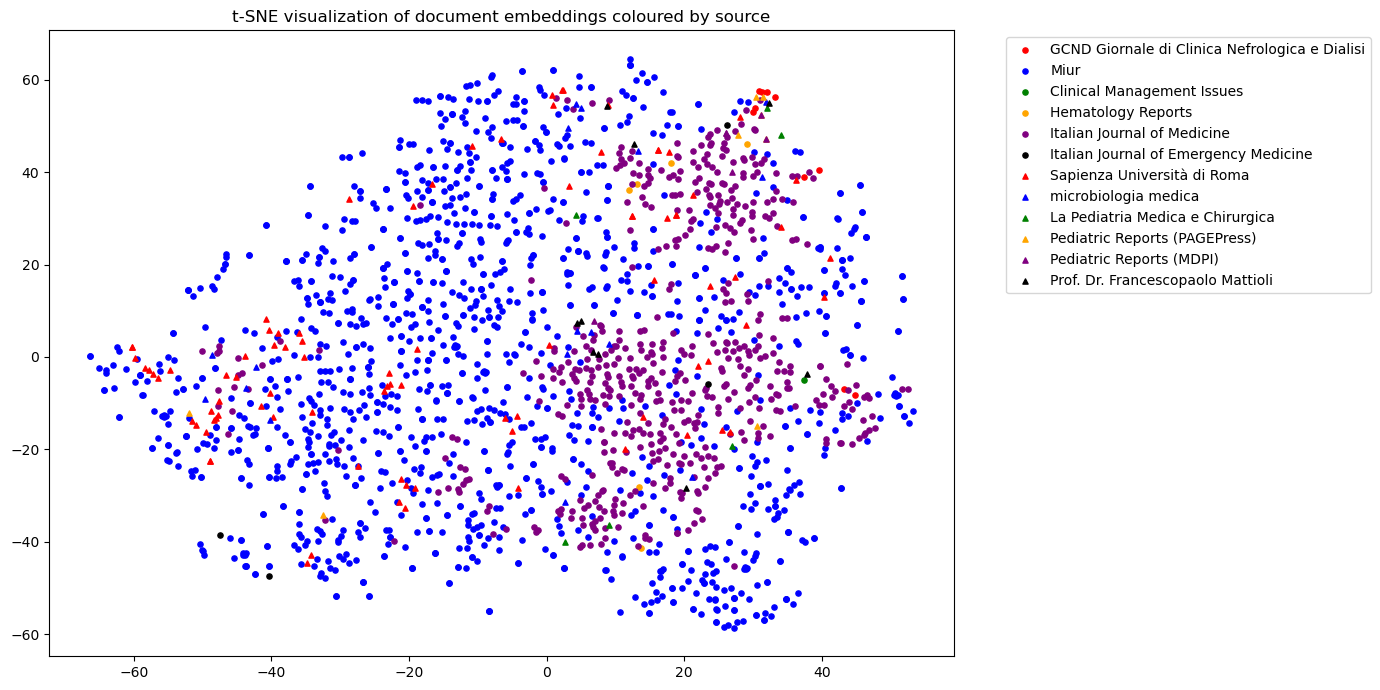

In [47]:
colori = ['red', 'blue', 'green', 'orange', 'purple','black']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%6]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3.svg')
plt.savefig('immagini\sources_layer3.eps')
plt.show()

Con aifa

In [48]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


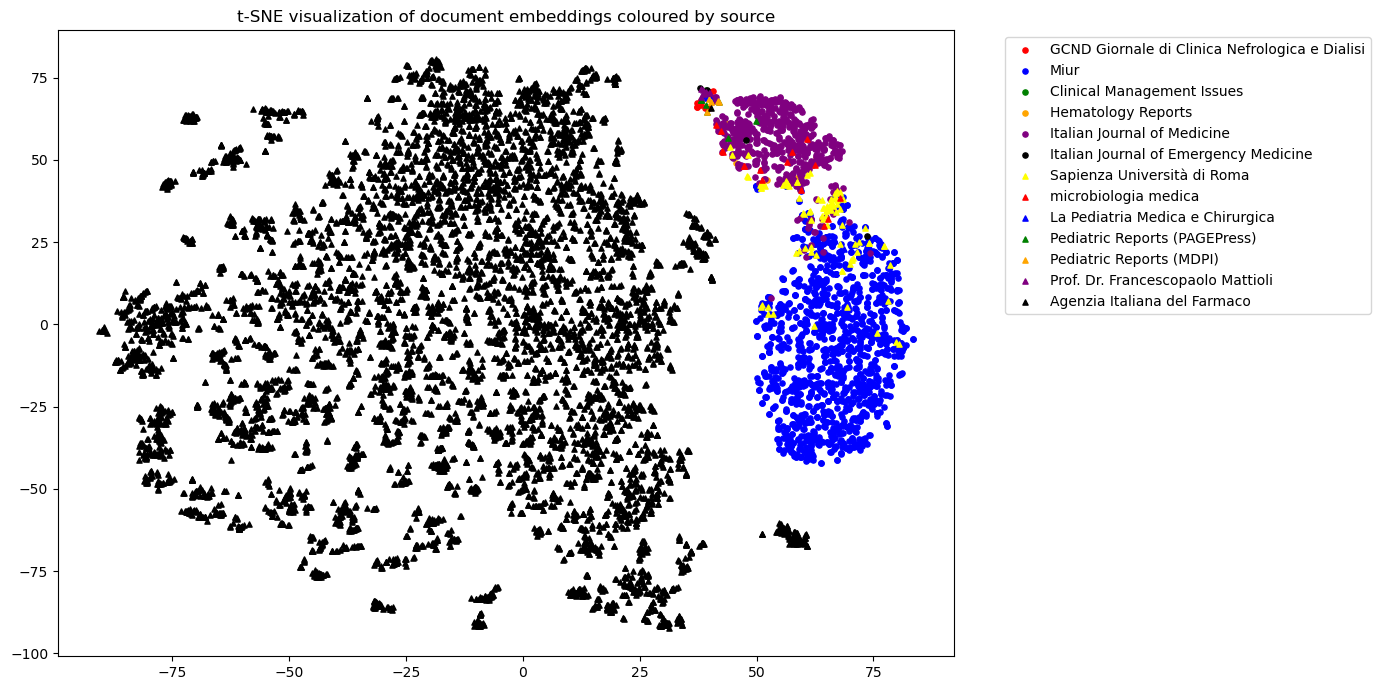

In [49]:
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    lista_source3.append(source)
                    lista_testi3.append(testo)
                    
            except Exception as e:
                pass
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <1000: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>1000:
        colorvecLunghezza.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

colori = ['red', 'blue', 'green', 'orange', 'purple','black','yellow']
stili = ['o', '^', 's', 'x', '*']

for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%7]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    

    
    plt.scatter(df[df['Source'] == source]['EmbeddingsTsneDim0'], 
                df[df['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3conAIFA.svg')
plt.savefig('immagini\sources_layer3conAIFA.eps')
plt.show()

Provo ora, dati gli embeddings di InfoGraph fatti con AIFA, a runnare tsne solo degli embeddings senza aifa e vedo cosa ne
viene fuori.

In [38]:
dfsenzaAIFA

,Index,Text,Length,Source,ColorvecLunghezza,EmbeddingsTsneDim0,EmbeddingsTsneDim1
0,0,C.C. iniziava a fare dialisi all’età di 17 ann...,4372,GCND Giornale di Clinica Nefrologica e Dialisi,1,100.607697,-14.130852
1,1,I.Z. è un giovane di 22 anni. Pochi giorni pri...,6579,GCND Giornale di Clinica Nefrologica e Dialisi,1,102.407684,-13.119352
2,2,Nel giugno 2007 presso la Struttura Complessa ...,4478,GCND Giornale di Clinica Nefrologica e Dialisi,1,100.642326,-14.028002
3,3,Donna di 75 anni affetta da diabete mellito di...,2745,GCND Giornale di Clinica Nefrologica e Dialisi,1,97.902412,-10.752368
4,4,Nel settembre del 2008 giunge alla nostra osse...,5750,GCND Giornale di Clinica Nefrologica e Dialisi,1,98.639076,-11.889225
...,...,...,...,...,...,...,...
2124,2124,Femmina - aa. 77 –\n\nAnamnesi patologica remo...,13387,Prof. Dr. Francescopaolo Mattioli,1,107.996574,-7.918508
2125,2125,1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...,5799,Prof. Dr. Francescopaolo Mattioli,1,104.150810,-5.944735
2126,2126,Maschio- aa. 52\n\nAnamnesi patologica remota\...,4758,Prof. Dr. Francescopaolo Mattioli,1,105.885796,-6.885508
2127,2127,"femmina, aa. 86\n\nAnamnesi patologica.\nprece...",4888,Prof. Dr. Francescopaolo Mattioli,1,105.624092,-8.522590


In [37]:
dfsenzaAIFA = df[df['Source']!='Agenzia Italiana del Farmaco']
emb3SenzaAIFA = emb3[:2129]

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3SenzaAIFA)  # embeddings è la tua matrice di embedding

dfsenzaAIFA['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
dfsenzaAIFA['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\enduser\AppData\Local\Temp\ipykernel_3316\1113263173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsenzaAIFA['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
C:\Users\enduser\AppData\Local\Temp\ipykernel_3316\1113263173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


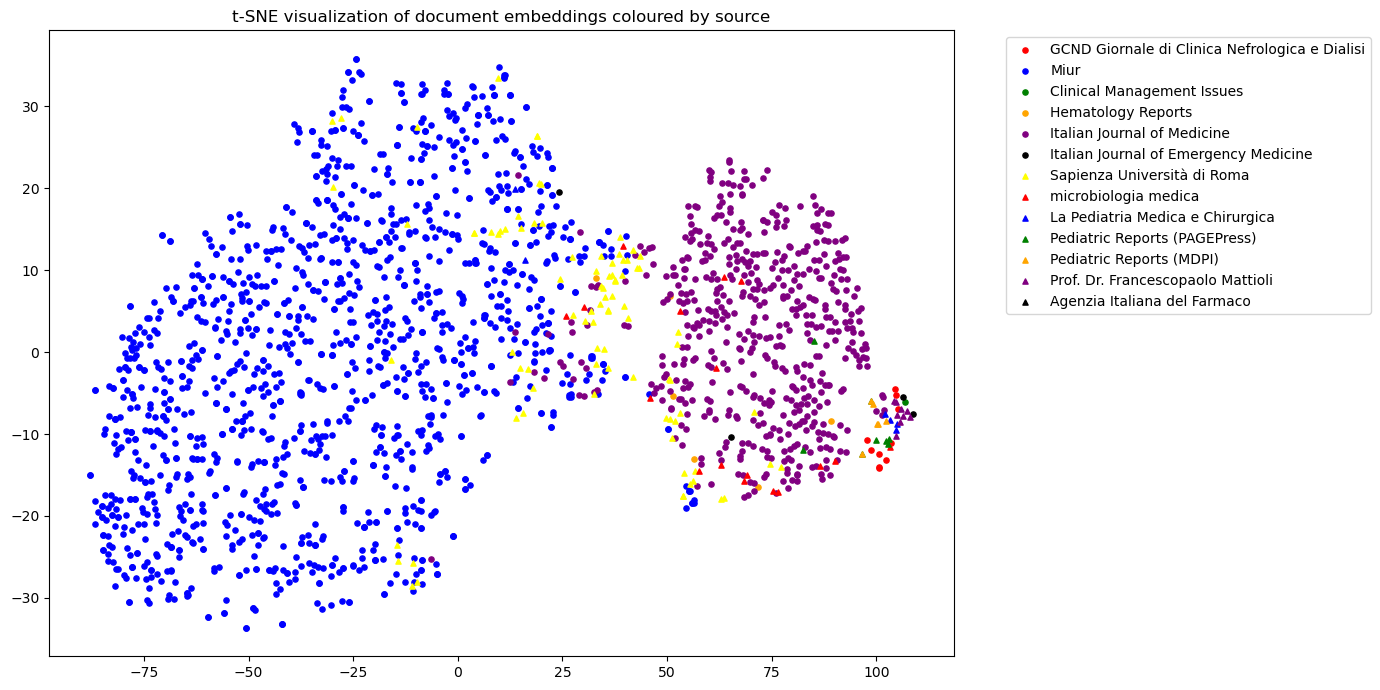

In [41]:


for i, source in enumerate(df['Source'].unique()):
    colore = colori[i%7]
    if i <6:
        stile = 'o'
    if i >=6:
        stile = '^'
    plt.scatter(dfsenzaAIFA[dfsenzaAIFA['Source'] == source]['EmbeddingsTsneDim0'], 
                dfsenzaAIFA[dfsenzaAIFA['Source'] == source]['EmbeddingsTsneDim1'], 
                s=14, label=source, c = colore ,marker =stile)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(14, 7)  # Imposta le dimensioni della figura
plt.title('t-SNE visualization of document embeddings coloured by source')
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/sources_layer3conAIFAsenzaAIFA.svg')
plt.savefig('immagini\sources_layer3conAIFAsenzaAIFA.eps')
plt.show()

# Plot by lunghezze

In [69]:
with open('FilePickles\EmbeddingLayer1and3_InfoGraphTRANSDUCTIVEhidden_dim32num_gc_layers3lr0.01_senza_AIFA.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)
emb1 = emb1and3[0:86] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
#siccome questi due file non contengono clinical entities!
emb3 = emb1and3[86:]

stringa_AIFA = '_senza_AIFA'

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(emb3)  # embeddings è la tua matrice di embedding
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

lista_testi3 = []
lista_source3 = []

for filename in os.listdir(cartella):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                # Estrai il testo dal campo "text" se presente
                if "text" in data and "source" in data:
                    testo = data["text"]
                    source = data["source"]
                    if source !='Agenzia Italiana del Farmaco':
                        lista_source3.append(source)
                        lista_testi3.append(testo)
                    
            except Exception as e:
                pass


C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [87]:
import pandas as pd

colorvecLunghezza = []

for testo in lista_testi3:
    if len(testo) <200: 
        colorvecLunghezza.append(0)#BLUE
    if len(testo)>=200:
        colorvecLunghezza.append(1) #RED
        
colorvecSource = []
lista_source_short_layer3 = ['Miur','Sapienza Università di Roma']

lista_source_long_layer3 = [parola for parola in df.Source.unique() if parola not in lista_source_short_layer3]
for source in lista_source3:
    if source in lista_source_short_layer3:
        colorvecSource.append(0) #BLUE
    if source in lista_source_long_layer3:
        colorvecSource.append(1) #RED

df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3
df['ColorvecSource'] = colorvecSource

df['ColorvecLunghezza'] = colorvecLunghezza
df['EmbeddingsTsneDim0'] = embeddings_tsne[:,0]
df['EmbeddingsTsneDim1'] = embeddings_tsne[:,1]

df['VecLunghezza'] = df['ColorvecLunghezza']
for i, val in enumerate(df['VecLunghezza']):
    if val == 0:
        df.loc[i, 'VecLunghezza'] = 'Corto'
    elif val == 1:
        df.loc[i, 'VecLunghezza'] = 'Lungo'

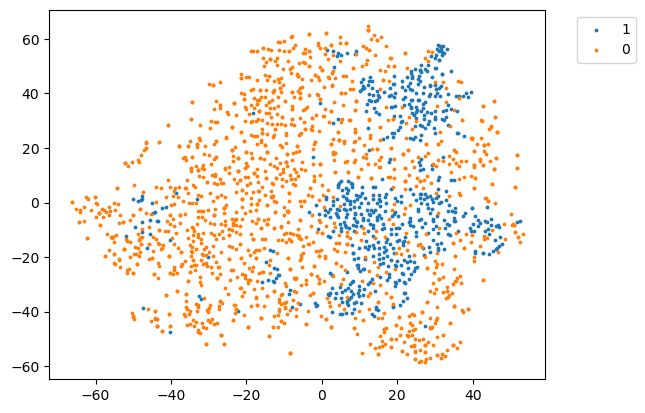

In [79]:
for lunghezza in df['ColorvecSource'].unique():
    plt.scatter(df[df['ColorvecSource']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['ColorvecSource']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

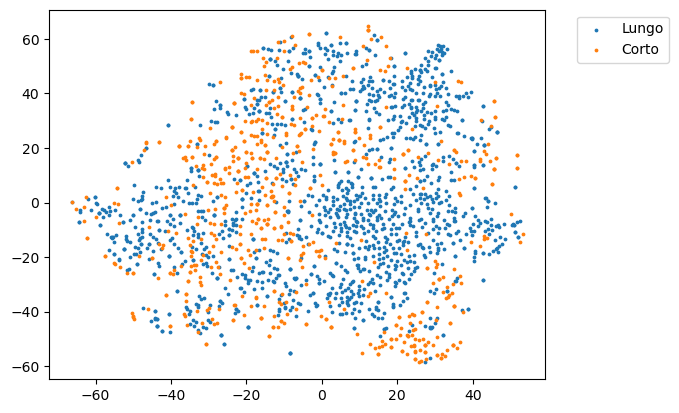

In [88]:
for lunghezza in df['VecLunghezza'].unique():
    plt.scatter(df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim0'],
                df[df['VecLunghezza']==lunghezza]['EmbeddingsTsneDim1'], s = 3, label = lunghezza)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [73]:
df

,Index,Text,Length,Source,ColorvecSource,ColorvecLunghezza,EmbeddingsTsneDim0,EmbeddingsTsneDim1,VecLunghezza
0,0,C.C. iniziava a fare dialisi all’età di 17 ann...,4372,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,30.822714,57.652451,Lungo
1,1,I.Z. è un giovane di 22 anni. Pochi giorni pri...,6579,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,32.106537,57.378700,Lungo
2,2,Nel giugno 2007 presso la Struttura Complessa ...,4478,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,31.380047,57.387531,Lungo
3,3,Donna di 75 anni affetta da diabete mellito di...,2745,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,37.489555,38.905788,Lungo
4,4,Nel settembre del 2008 giunge alla nostra osse...,5750,GCND Giornale di Clinica Nefrologica e Dialisi,1,1,33.237316,56.345196,Lungo
...,...,...,...,...,...,...,...,...,...
2124,2124,Femmina - aa. 77 –\n\nAnamnesi patologica remo...,13387,Prof. Dr. Francescopaolo Mattioli,1,1,32.300713,54.908382,Lungo
2125,2125,1° caso clinico\n\nFemmina - aa. 77\nAnamnesi ...,5799,Prof. Dr. Francescopaolo Mattioli,1,1,37.850964,-3.793020,Lungo
2126,2126,Maschio- aa. 52\n\nAnamnesi patologica remota\...,4758,Prof. Dr. Francescopaolo Mattioli,1,1,7.440516,0.583831,Lungo
2127,2127,"femmina, aa. 86\n\nAnamnesi patologica.\nprece...",4888,Prof. Dr. Francescopaolo Mattioli,1,1,4.437738,7.323576,Lungo


# MiurSap vs Other

In [71]:
dfMiurSap = df[df['ColorvecSource']==0]
dfOther = df[df['ColorvecSource']==1]